   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

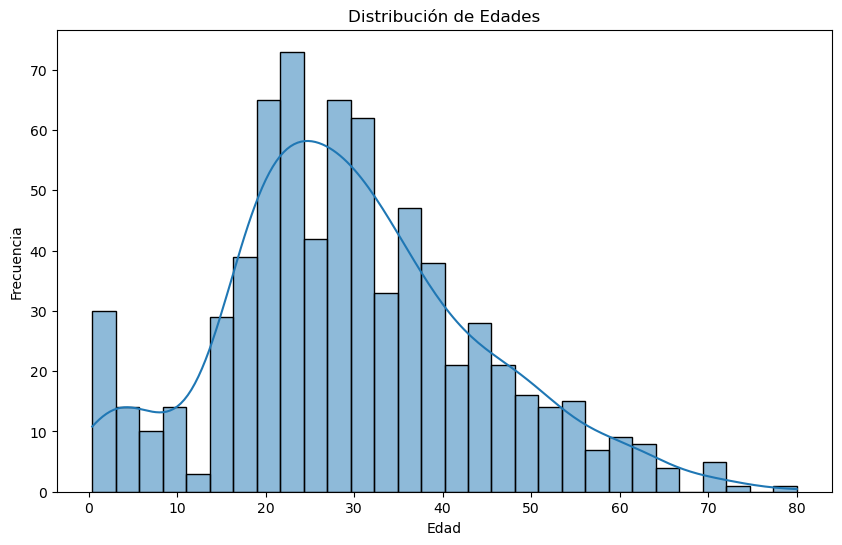

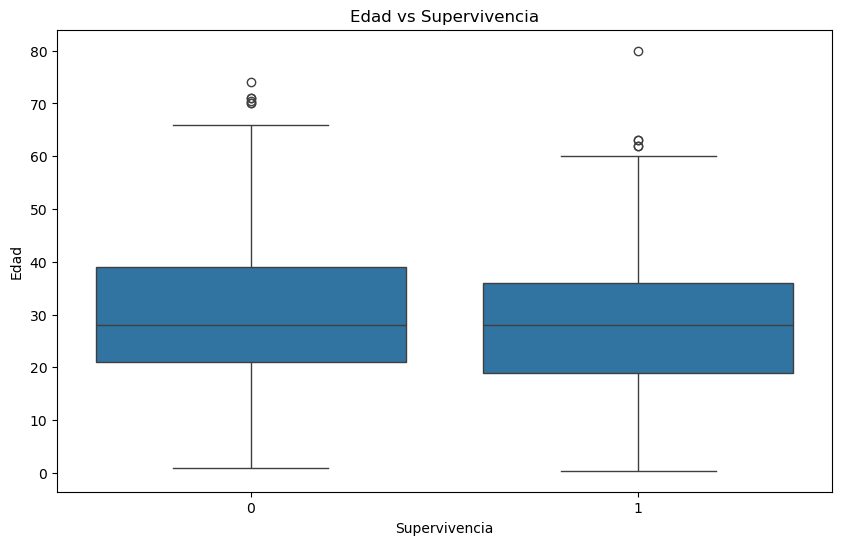

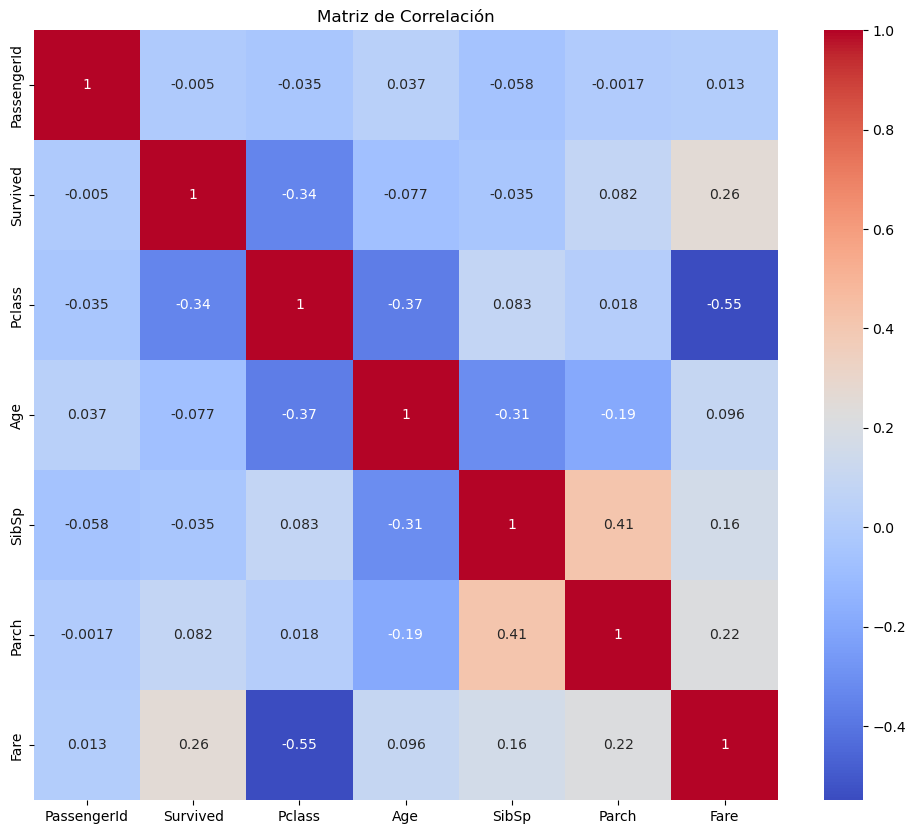

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Matriz de Confusión:
[[90 15]
 [19 55]]
Precisión del Modelo:
0.8100558659217877


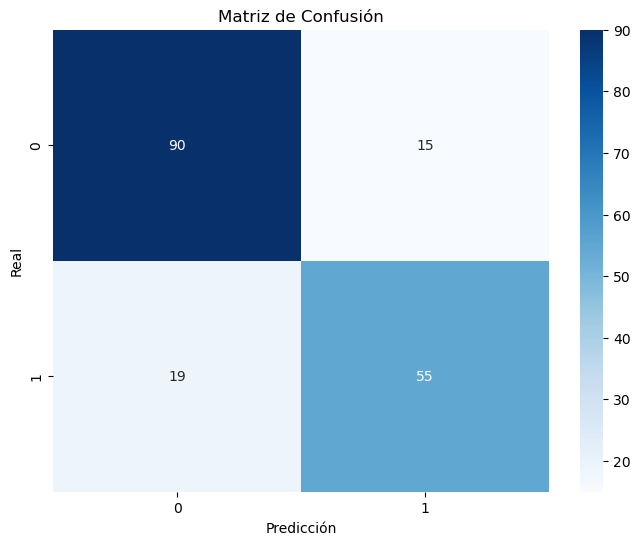

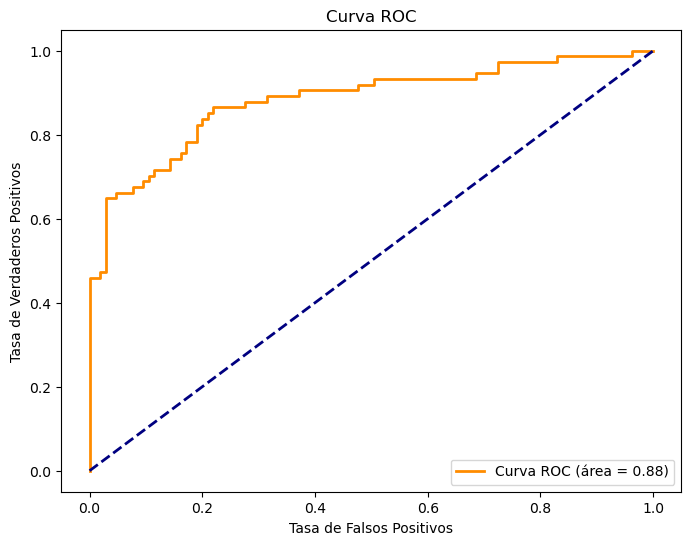

In [7]:
# Paso 0: Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

# Cargar el conjunto de datos
df = pd.read_csv('Titanic-Dataset.csv')

# Mostrar las primeras filas del conjunto de datos
print(df.head())

# Obtener información general sobre el conjunto de datos
print(df.info())

# Describir estadísticamente las columnas numéricas
print(df.describe())

# Contar valores nulos en cada columna
print(df.isnull().sum())

# Visualizar la distribución de edades
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la relación entre la edad y la supervivencia
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Edad vs Supervivencia')
plt.xlabel('Supervivencia')
plt.ylabel('Edad')
plt.show()

# Visualizar la correlación entre variables numéricas
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Paso 2: Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

# Llenar los valores faltantes de 'Age' con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# Llenar los valores faltantes de 'Embarked' con el modo
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Eliminar la columna 'Cabin' debido a muchos valores faltantes
df.drop('Cabin', axis=1, inplace=True)

# Convertir variables categóricas en numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Crear variables dummy para 'Embarked'
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

# Paso 3: Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

# Seleccionar las características y la variable objetivo
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# Paso 4: Dividir el dataset en Train y Test para evaluar correctamente el modelo.

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenar el modelo configurando los diferentes hiperparámetros.

from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Paso 6: Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar las métricas de evaluación
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred))

print('Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred))

print('Precisión del Modelo:')
print(accuracy_score(y_test, y_pred))

# Paso 7: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Graficar la curva ROC
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()

# Paso 8: Interpretar, analizar y documentar los resultados obtenidos

# Comentarios:
# - El modelo de Regresión Logística tiene una precisión moderada en el conjunto de prueba.
# - Las características más influyentes parecen ser 'Sex', 'Pclass' y 'Age'.
# - La matriz de confusión muestra que el modelo es mejor prediciendo no supervivientes.
# - La curva ROC indica una buena capacidad de discriminación del modelo.
